In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from empiricaldist import Pmf
from scipy.stats import binom

def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    ax = plt.gca()
    ax.set(**options)

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

### Exercise 1:

Exercise: Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.

You think there are fewer then 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:

- You ask how many people were born on May 11 and two people raise their hands.

- You ask how many were born on May 23 and 1 person raises their hand.

- Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience? What is the probability that there are more than 1200 people. Hint: Remember the binomial distribution.

In [22]:
# we can just assume 1-2000 are equally likely
# modification -> going to assume I can quickly count at least 40 people -> minimal impact
hypos = np.arange(20, 2000)
prior = Pmf(1, hypos)
prior.normalize()

# Given each hypothesis, what is the likelihood of seeing the following
likelihood1 = binom.pmf(2, hypos, 1/365)
likelihood2 = binom.pmf(1, hypos, 1/365)
likelihood3 = binom.pmf(0, hypos, 1/365)

# update
prior *= likelihood1 * likelihood2 * likelihood3
prior.normalize()

0.006826925750734616

In [26]:
likelihood1

array([0.00135744, 0.00149622, 0.00164133, ..., 0.06279407, 0.06268478,
       0.06257565])

Posterior mean: 486.23853939991375
Likelihood of exceeding 2000: 0.011237340072868827


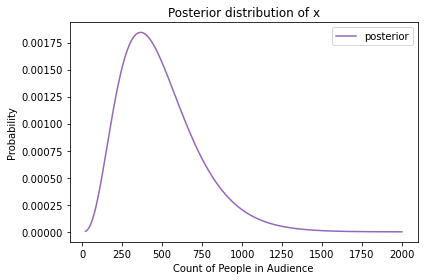

In [24]:
def decorate_plot(title):
    decorate(xlabel='Count of People in Audience',
             ylabel='Probability',
             title=title)
    
prior.plot(label='posterior', color='C4')
decorate_plot(title='Posterior distribution of x');

print(f"Posterior mean: {prior.mean()}")
print(f"Likelihood of exceeding 2000: {prior.prob_gt(1200)}")

#### Exercise 1 Thoughts:

- relatively straightforward, however using the binomial is interesting. I don't think I would have defaulted to that.
- binomial: 
    - the idea being we assume everyone has a 1/365 likelihood of being born on each day
    - we pass in our findings (e.g. 2 hands raised) along with hypotheses around count
    - we get a likelihood for each hypothesis (independent of all hypotheses, so doesn't sum to 1, which makes sense as we could pass in infinite hypos) based on the "trues" (hands raised)
    - below is an example of how this likelihood function interacts with data

In [31]:
# as expected, if we see 2 hands and have a 1/365 chance it is much morelikely we have 500 people than 10 or 5_000
[x for x in binom.pmf(2, [10, 500, 5_000], 1/365)]

[0.0003304417689522602, 0.23883467697687655, 0.00010404383244911251]

### Exercise 2:

I often see rabbits in the garden behind my house, but it’s not easy to tell them apart, so I don’t really know how many there are.

Suppose I deploy a motion-sensing camera trap that takes a picture of the first rabbit it sees each day. After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different.

*How many rabbits visit my garden?*

To answer this question, we have to think about the prior distribution and the likelihood of the data:

I have sometimes seen four rabbits at the same time, so I know there are at least that many. I would be surprised if there were more than 10. So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.

To keep things simple, let’s assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let’s also assume it is guaranteed that the camera trap gets a picture every day.

In [44]:
# build prior
hypos = np.arange(4, 11)
prior = Pmf(1, hypos)
prior.normalize()

7

Figuring out likelihood:

- we need to determine how likely it is to see the same rabbit twice over 3 days (as the first rabbit). 
- if likelihood of being first is `x`, then a rabbit has the following likelihood of being seen again after being seen once:
$x*(1-x) = x^{1} - x^{2}$

where $x = 1/N$

so:

$\frac{1}{N} (1 - \frac{1}{N}) $

In [45]:
# build likelihood
likelihood = (1/hypos) * (1 - (1/hypos))

In [46]:
prior *= likelihood
prior.normalize()

0.129568328654213

Posterior mean: 6.509929813748172
Posterior Max: 4 with likelihood 0.206730


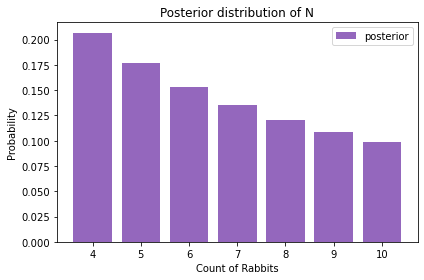

In [55]:
def decorate_plot(title):
    decorate(xlabel='Count of Rabbits',
             ylabel='Probability',
             title=title)
    
prior.bar(label='posterior', color='C4')
decorate_plot(title='Posterior distribution of N');

print(f"Posterior mean: {prior.mean()}") # mean doesn't fully make sense here
print(f"Posterior Max: {prior.max_prob()} with likelihood {prior.prob_eq(prior.max_prob()):2f}")

### Exercise 3: 

Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each. One day, you visit a prison and choose a prisoner at random. What is the probability that they are serving a 3-year sentence? What is the average remaining sentence of the prisoners you observe?

In [56]:
# build prior
hypos = np.arange(1, 4)
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
1,0.333333
2,0.333333
3,0.333333


Likelihood logic from solutions:

- our prior is uniform, but the likelihood is not 

- we are told that it is more likely to encounter a prisoner serving a 3 year sentence than a 1 year sentence if we choose an arbitrary point in time. i think i disagree with this but it depends on how we interpret it:

perhaps this is based on some starting point, such as Jan 2018:
- 30 total sentences, 10 for 1 year, 10 for 2 year, 10 for 3 year
- then the same happens in 2019
- so in June 2019 we would see: 10 1 year, 20 2 year, 20 3 year

however, my interpretation is as follows:
- at any time we see an equal number across sentences
- this would mean that in the above example on Jan 2019 we would have to double the 1 year sentences to match the new 2 & 3 year sentences. 

I assume the more likely is the former, which then makes sense why the likelihood is chosen as it is: